In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from spacy import displacy

#### Aula 1 - Análise abstracts

In [3]:
arqs = os.listdir('../dados')

In [6]:
for i,arq in enumerate(arqs):
    
    if i == 0:
        df = pd.read_excel(f'C:/JupyterLab/PCA/Aula 02/praticas-computacionais-avancadas/dados/{arq}')
    else:
        aux = pd.read_excel(f'C:/JupyterLab/PCA/Aula 02/praticas-computacionais-avancadas/dados/{arq}')
        df = pd.concat([df,aux])

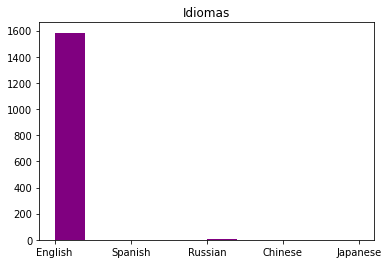

In [7]:
plt.hist(df['Language'], color='purple')
plt.title('Idiomas')
plt.show()

In [8]:
for i,arq in enumerate(arqs):
    
    if i == 0:
        df = pd.read_excel(f'../dados/{arq}')
        df = df.loc[df['Language'] == 'English']
    else:
        aux = pd.read_excel(f'../dados/{arq}')
        aux = aux.loc[aux['Language'] == 'English']
        df = pd.concat([df,aux])

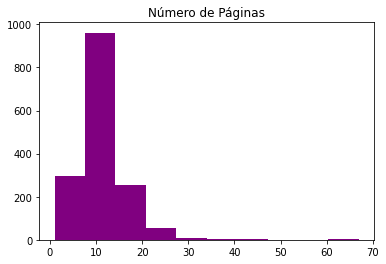

In [9]:
plt.hist(df['Number of Pages'], color='purple')
plt.title('Número de Páginas')
plt.show()

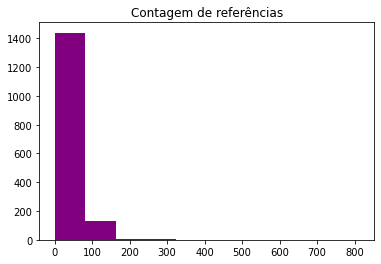

In [10]:
plt.hist(df['Cited Reference Count'], color='purple')
plt.title('Contagem de referências')
plt.show()

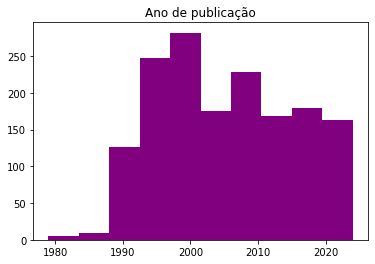

In [11]:
plt.hist(df['Publication Year'], color='purple')
plt.title('Ano de publicação')
plt.show()

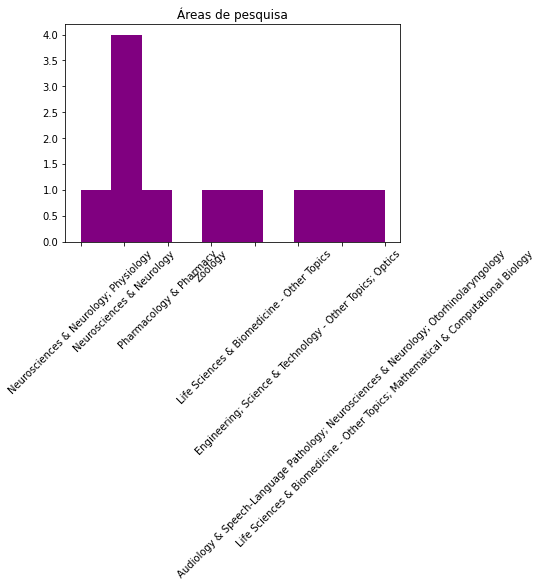

In [12]:
qtd = 11
plt.hist(df['Research Areas'][:qtd], color='purple')
plt.title('Áreas de pesquisa')
plt.xticks(rotation=45)
plt.show()

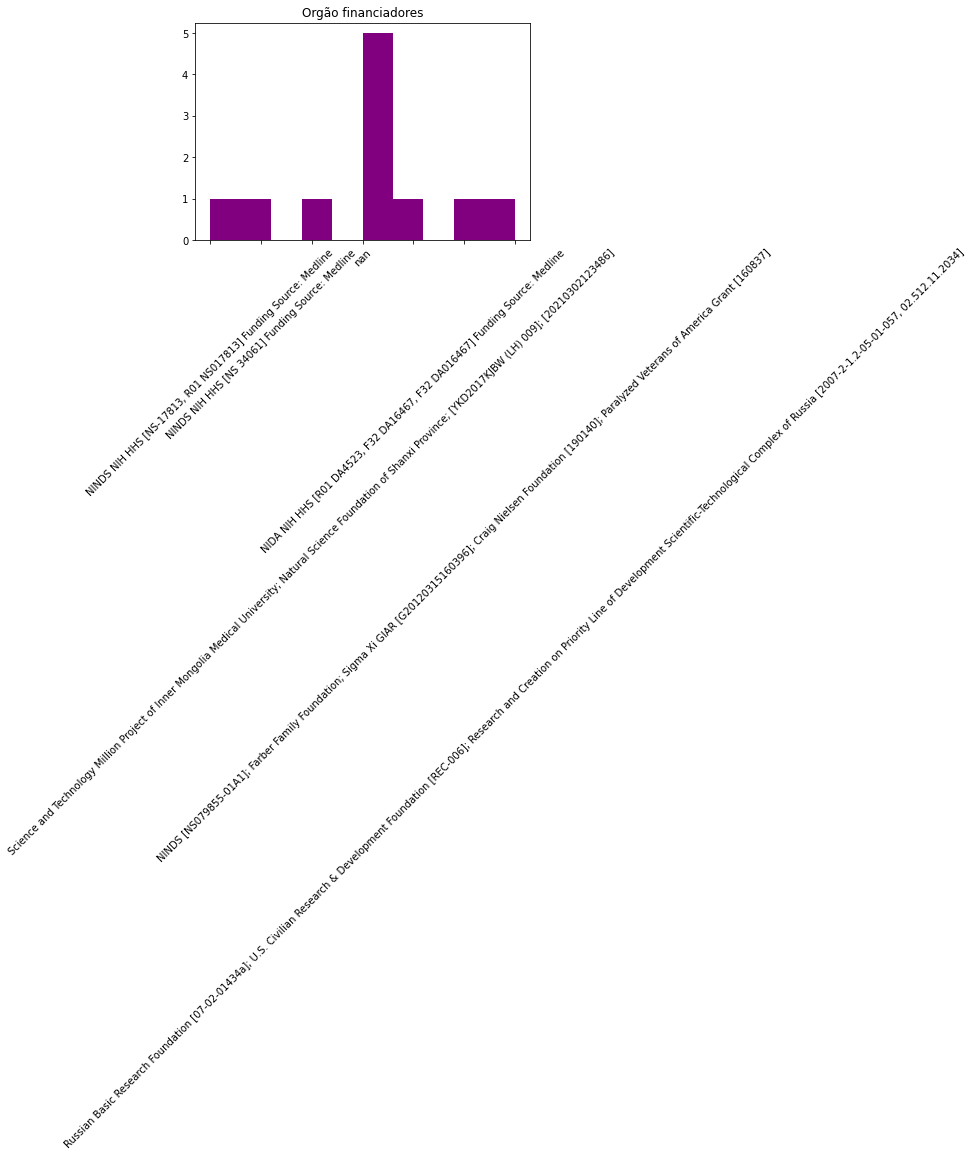

In [13]:
plt.hist(df['Funding Orgs'].astype(str)[:qtd], color='purple')
plt.title('Orgão financiadores')
plt.xticks(rotation=45)
plt.show()

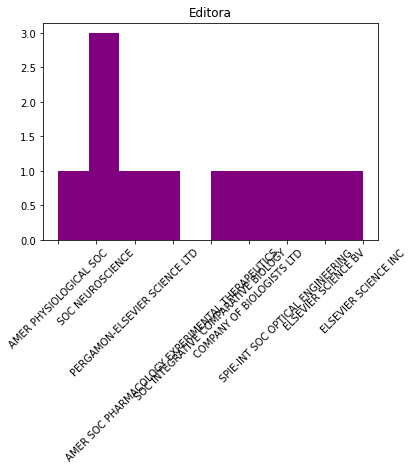

In [14]:
plt.hist(df['Publisher'][:qtd], color='purple')
plt.title('Editora')
plt.xticks(rotation=45)
plt.show()

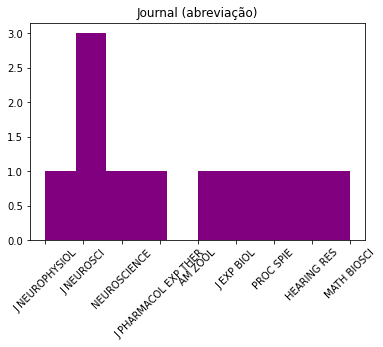

In [17]:
plt.hist(df['Journal Abbreviation'].astype(str)[:qtd], color='purple')
plt.title('Journal (abreviação)')
plt.xticks(rotation=45)
plt.show()

In [18]:
dic_key={}

for keywords in df['Keywords Plus']:
    if not isinstance(keywords,float):
        
        keywords = keywords.split(' ')
        
        for keyword in keywords:
            if ';' in keyword:
                keyword = keyword.replace(';','')
            
            keyword = keyword.lower()
            
            if keyword not in dic_key:
                dic_key[keyword] = 1
            else:
                dic_key[keyword] += 1

dic_key = dict(sorted(dic_key.items(), key=lambda item: item[1]))

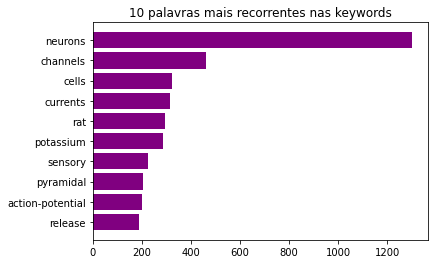

In [19]:
qtd = 10
plt.barh(list(dic_key.keys())[-qtd:],list(dic_key.values())[-qtd:],color='purple')
plt.title(f'{qtd} palavras mais recorrentes nas keywords')
plt.show()

#### Aula 2 - Extração dos valores em ms

In [20]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [72]:
limite = 20
count = 0
lista_vals, abs_vals = [], []

for abs_index,abstract in enumerate(df['Abstract']):

    if not isinstance(abstract,float):
        if ' ms ' in abstract:
            
            doc = nlp(abstract)
            # doc = [t for t in doc if not t.is_stop]            
            
            ms_indexes = []
            for t in doc:
                if t.text=='ms':
                    ms_indexes.append(t.i)
                    count+=1
                    
            for ms_index in ms_indexes:
                doc_aux = doc[ms_index-20:ms_index+20]
                doc_aux = nlp(str(doc_aux))
                
                #print(doc_aux)
                for t in doc_aux:
                    if t.text=='ms':
                        check_index = 1
                        vals = []
                        while True:
                            if doc_aux[t.i-check_index].like_num:
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            elif str(doc_aux[t.i-check_index]) == '/-' or str(doc_aux[t.i-check_index]) == '+' or str(doc_aux[t.i-check_index]) == '-' or str(doc_aux[t.i-check_index]) == 'and' or str(doc_aux[t.i-check_index]) == 'to':
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            else:
                                break
                        # print(vals[::-1])
                        if len(vals) != 0:
                            lista_vals.append(vals[::-1])
                            abs_vals.append([abs_index,vals[::-1],doc_aux])      
        
        if ' millisecond ' in abstract:
            
            doc = nlp(abstract)
            # doc = [t for t in doc if not t.is_stop]            
            
            ms_indexes = []
            for t in doc:
                if t.text=='millisecond':
                    ms_indexes.append(t.i)
                    count+=1
                    
            for ms_index in ms_indexes:
                doc_aux = doc[ms_index-20:ms_index+20]
                doc_aux = nlp(str(doc_aux))
                
                # print(doc_aux)
                for t in doc_aux:
                    if t.text=='millisecond':
                        check_index = 1
                        vals = []
                        while True:
                            if doc_aux[t.i-check_index].like_num:
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            elif str(doc_aux[t.i-check_index]) == '/-' or str(doc_aux[t.i-check_index]) == '+' or str(doc_aux[t.i-check_index]) == '-' or str(doc_aux[t.i-check_index]) == 'and' or str(doc_aux[t.i-check_index]) == 'to':
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            else:
                                break
                        # print(vals[::-1])
                        if len(vals) != 0:
                            lista_vals.append(vals[::-1])
                            abs_vals.append([abs_index,vals[::-1],doc_aux])
        
        if ' milliseconds ' in abstract:
            
            doc = nlp(abstract)
            # doc = [t for t in doc if not t.is_stop]            
            
            ms_indexes = []
            for t in doc:
                if t.text=='milliseconds':
                    ms_indexes.append(t.i)
                    count+=1
                    
            for ms_index in ms_indexes:
                doc_aux = doc[ms_index-20:ms_index+20]
                doc_aux = nlp(str(doc_aux))
                
                # print(doc_aux)
                for t in doc_aux:
                    if t.text=='milliseconds':
                        check_index = 1
                        vals = []
                        while True:
                            if doc_aux[t.i-check_index].like_num:
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            elif str(doc_aux[t.i-check_index]) == '/-' or str(doc_aux[t.i-check_index]) == '+' or str(doc_aux[t.i-check_index]) == '-' or str(doc_aux[t.i-check_index]) == 'and' or str(doc_aux[t.i-check_index]) == 'to':
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            else:
                                break
                        # print(vals[::-1])
                        if len(vals) != 0:
                            lista_vals.append(vals[::-1])
                            abs_vals.append([abs_index,vals[::-1],doc_aux])

In [73]:
abs_vals

[[10,
  ['hundred'],
  amplitude of about 100 mV. However, differently from the nerve cell, the action potential lasts a few hundred milliseconds before repolarization. Moreover, several types of K+ channel such as the classical inward rectifier K+ channel,],
 [25,
  ['100', '-', '120'],
  . In seven of ten type B cells tested, the spontaneous spikes developed plateau potentials of 100-120 ms duration in 10 mM TEA, which then became 7-9 s long in Ca2+-free medium],
 [25,
  ['to', '30', '-', '100'],
  , the spontaneous plateaux were 1.75-2 s long in TEA, and were reduced to 30-100 ms in Ca2+-free medium. TTX abolished the spontaneous spikes and plateaux. The delayed AHP was abolished],
 [28,
  ['100'],
  strength-duration time constant (tau(SD)); current/threshold relationship; threshold electrotonus to a 100 ms polarizing current; and recovery curves to a supramaximal stimulus. Results: Compound muscle action potential (CMAP],
 [28,
  ['0.50', '+', '/-', '0.03'],
  with membrane hyperp

In [22]:
inf,sup = [],[]

for val in lista_vals:
    if 'and' not in val and 'to' not in val:
        
        if '+' in val and '/-' in val:
            if val[0] != '+':
                # print(val[0],'+/-',val[-1])
                
                if ',' in val[0]:
                    val[0] = val[0].replace(',','.')
                
                if ',' in val[-1]:
                    val[-1] = val[-1].replace(',','.')
                    
                inf.append(round(float(val[0])-float(val[-1]),4))
                sup.append(round(float(val[0])+float(val[-1]),4))
                
                # print(f'inf {float(val[0])-float(val[-1])}')
                # print(f'sup {float(val[0])+float(val[-1])}')
            # print()
            
        # elif '-' in val:
            # print(val)

In [23]:
print('Contagem de ocorrências',count)

Contagem de ocorrências 366


In [35]:
word_count = {}
for abs_val in abs_vals:
    #sentence = abs_val[2]
    #print(sentence)

    sentence =[t for t in abs_val[2] if not t.is_stop]
    sentence =[t for t in sentence if not t.is_punct]
    sentence =[t for t in sentence if not t.like_num]

    for word in sentence:
        word = str(word)
        if word not in word_count.keys():
            #print(word_count.keys())
            word_count[word] = 1
        else:
            word_count[word] += 1

In [37]:
sorted_word_count = {k: v for k, v in sorted(word_count.items(), key=lambda item: item[1])}
list(sorted_word_count.keys())[-50:]

['firing',
 'depolarization',
 'durations',
 'frequency',
 'vs',
 'mV.',
 'pulses',
 'slow',
 'AHP',
 'spike',
 'induced',
 'EPSPs',
 'rise',
 'latency',
 'repolarization',
 'outward',
 'evoked',
 'decay',
 'currents',
 'p',
 'peak',
 'mean',
 'cells',
 'potentials',
 'vs.',
 'fast',
 'respectively',
 'decreased',
 'pulse',
 'reduced',
 'constant',
 'IR',
 'membrane',
 'P',
 'AP',
 'increased',
 'n',
 'depolarizing',
 'amplitude',
 '<',
 '=',
 'neurons',
 'mV',
 'action',
 'current',
 'potential',
 'duration',
 'time',
 '+',
 'ms']

In [52]:
cells_count = {}
for abs_val in abs_vals:
    #sentence = abs_val[2]
    #print(sentence)

    sentence =[t for t in abs_val[2] if not t.is_stop]
    sentence =[t for t in sentence if not t.is_punct]
    sentence =[t for t in sentence if not t.like_num]

    for word in sentence:
        #word = str(word)
        if str(word) == "cells":
            
            cell_type_i = sentence.index(word) - 1
            cell_type = sentence[cell_type_i]

            cell_type = str(cell_type)

            if cell_type not in cells_count.keys():
                #print(word_count.keys())
                cells_count[cell_type] = 1
            else:
                cells_count[cell_type] += 1

In [55]:
sorted_cells_count = {k: v for k, v in sorted(cells_count.items(), key=lambda item: item[1])}
list(sorted_cells_count.items())[-10:]

[('potential', 1),
 ('Octopus', 1),
 ('inhibition', 1),
 ('s', 2),
 ('cord', 2),
 ('pyramidal', 2),
 ('III', 2),
 ('basket', 3),
 ('bistratified', 4),
 ('spiking', 6)]

In [96]:
limite = 20
count = 0
lista_mV_vals, abs_mV_vals, abs_ms_mV = [], [], []

#print(abs_vals)
for abs in abs_vals:

    abs_index = abs[0]
    ms_val = abs[1]
    ms_sentence = abs[2]

    #for abs_index, ms_val, ms_sentence in zip(abs[0], abs[1], abs[2]):
        
    print(abs_index)
    abstract= list(df['Abstract'])[abs_index]
    #print(abstract)

    if not isinstance(abstract,float):
        if ' mV ' in abstract:
            
            doc = nlp(abstract)
            # doc = [t for t in doc if not t.is_stop]            
            
            mV_indexes = []
            for t in doc:
                if t.text=='mV':
                    mV_indexes.append(t.i)
                    count+=1
                    
            for mV_index in mV_indexes:
                doc_aux = doc[mV_index-20:mV_index+20]
                doc_aux = nlp(str(doc_aux))
                
                #print(doc_aux)
                for t in doc_aux:
                    if t.text=='mV':
                        check_index = 1
                        vals = []
                        while True:
                            if doc_aux[t.i-check_index].like_num:
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            elif str(doc_aux[t.i-check_index]) == '/-' or str(doc_aux[t.i-check_index]) == '+' or str(doc_aux[t.i-check_index]) == '-' or str(doc_aux[t.i-check_index]) == 'and' or str(doc_aux[t.i-check_index]) == 'to':
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            else:
                                break
                        # print(vals[::-1])
                        if len(vals) != 0:
                            lista_mV_vals.append(vals[::-1])
                            abs_mV_vals.append([abs_index,vals[::-1],doc_aux])
                            abs_ms_mV.append([abs_index, ms_val, vals[::-1]])      
        
        if ' millivolt ' in abstract:
            
            doc = nlp(abstract)
            # doc = [t for t in doc if not t.is_stop]            
            
            mV_indexes = []
            for t in doc:
                if t.text=='millivolt':
                    mV_indexes.append(t.i)
                    count+=1
                    
            for mV_index in mV_indexes:
                doc_aux = doc[mV_index-20:mV_index+20]
                doc_aux = nlp(str(doc_aux))
                
                # print(doc_aux)
                for t in doc_aux:
                    if t.text=='millivolt':
                        check_index = 1
                        vals = []
                        while True:
                            if doc_aux[t.i-check_index].like_num:
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            elif str(doc_aux[t.i-check_index]) == '/-' or str(doc_aux[t.i-check_index]) == '+' or str(doc_aux[t.i-check_index]) == '-' or str(doc_aux[t.i-check_index]) == 'and' or str(doc_aux[t.i-check_index]) == 'to':
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            else:
                                break
                        # print(vals[::-1])
                        if len(vals) != 0:
                            lista_mV_vals.append(vals[::-1])
                            abs_mV_vals.append([abs_mV_index,vals[::-1],doc_aux])
                            abs_ms_mV.append([abs_index, ms_val, vals[::-1]]) 
        
        if ' millivolts ' in abstract:
            
            doc = nlp(abstract)
            # doc = [t for t in doc if not t.is_stop]            
            
            mV_indexes = []
            for t in doc:
                if t.text=='millivolts':
                    mV_indexes.append(t.i)
                    count+=1
                    
            for mV_index in mV_indexes:
                doc_aux = doc[mV_index-20:mV_index+20]
                doc_aux = nlp(str(doc_aux))
                
                # print(doc_aux)
                for t in doc_aux:
                    if t.text=='millivolts':
                        check_index = 1
                        vals = []
                        while True:
                            if doc_aux[t.i-check_index].like_num:
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            elif str(doc_aux[t.i-check_index]) == '/-' or str(doc_aux[t.i-check_index]) == '+' or str(doc_aux[t.i-check_index]) == '-' or str(doc_aux[t.i-check_index]) == 'and' or str(doc_aux[t.i-check_index]) == 'to':
                                vals.append(str(doc_aux[t.i-check_index]))
                                check_index+=1
                            else:
                                break
                        # print(vals[::-1])
                        if len(vals) != 0:
                            lista_mV_vals.append(vals[::-1])
                            abs_mV_vals.append([abs_mV_index,vals[::-1],doc_aux])
                            abs_ms_mV.append([abs_index, ms_val, vals[::-1]]) 

10
25
25
28
28
28
28
28
44
44
44
44
44
45
51
53
55
62
62
85
97
97
97
103
108
108
108
108
108
108
113
113
113
114
124
126
126
155
155
155
155
172
172
172
172
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
220
222
227
227
284
284
284
284
284
284
284
287
287
290
296
296
302
305
305
305
305
326
326
326
326
333
341
341
341
341
344
344
344
344
344
344
344
344
344
344
344
344
344
344
344
355
355
355
355
355
355
356
356
356
356
363
368
368
368
368
368
368
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
376
385
393
393
393
393
393
393
411
411
419
419
419
419
419
419
436
438
438
478
481
481
481
481
481
497
497
497
497
497
534
537
537
537
537
537
543
543
543
543
549
550
550
550
550
550
550
552
552
552
552
552
562
562
562
562
562
562
562
562
562
562
604
604
604
604
607
615
615
615
615
620
620
620
620
624
624
624
624
624
631
631
647
647
647
647
647
647
647
647
647
647
647
647
647
647
647
647
647
647
647
647
647
647
652
652
652
652
652
666
666
666

In [94]:
len(abs_vals)

503

In [95]:
len(abs_mV_vals)

1005

In [97]:
abs_ms_mV

[[44, ['9.8', '+', '/-', '4.5'], ['-69.2', '+', '/-', '4.6']],
 [44, ['9.8', '+', '/-', '4.5'], ['13.5', '+', '/-', '6.7']],
 [44,
  ['1.9', '+', '/-', '0.5', 'and', '10.7', '+', '/-', '5.6'],
  ['-69.2', '+', '/-', '4.6']],
 [44,
  ['1.9', '+', '/-', '0.5', 'and', '10.7', '+', '/-', '5.6'],
  ['13.5', '+', '/-', '6.7']],
 [44,
  ['to', '3.3', '+', '/-', '1.3', 'and', '20.1', '+', '/-', '9.7'],
  ['-69.2', '+', '/-', '4.6']],
 [44,
  ['to', '3.3', '+', '/-', '1.3', 'and', '20.1', '+', '/-', '9.7'],
  ['13.5', '+', '/-', '6.7']],
 [44,
  ['/-', '0.5', 'and', '10.7', '+', '/-', '5.6'],
  ['-69.2', '+', '/-', '4.6']],
 [44,
  ['/-', '0.5', 'and', '10.7', '+', '/-', '5.6'],
  ['13.5', '+', '/-', '6.7']],
 [44,
  ['to', '3.3', '+', '/-', '1.3', 'and', '20.1', '+', '/-', '9.7'],
  ['-69.2', '+', '/-', '4.6']],
 [44,
  ['to', '3.3', '+', '/-', '1.3', 'and', '20.1', '+', '/-', '9.7'],
  ['13.5', '+', '/-', '6.7']],
 [114, ['40', '+', '17.6'], ['-68', '+', '/-', '4']],
 [114, ['40', '+', '17.6'

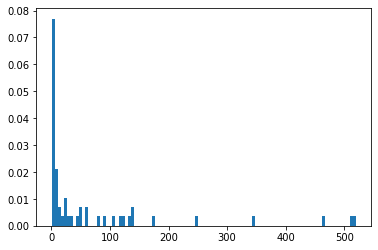

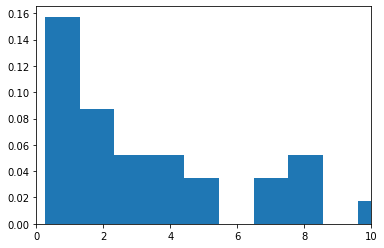

In [ ]:
plt.hist(inf,bins=100,density=True, color="purple")
plt.show()
plt.hist(inf,bins=500,density=True, color="purple")
plt.xlim(0,10)
plt.show()

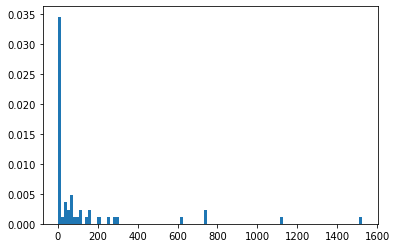

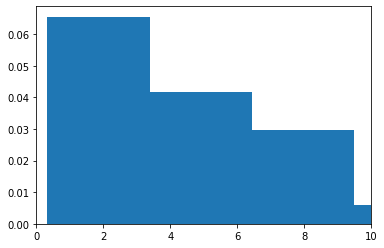

In [ ]:
plt.hist(sup,bins=100,density=True, color="purple")
plt.show()
plt.hist(sup,bins=500,density=True, color="purple")
plt.xlim(0,10)
plt.show()

In [ ]:
for abstract in random.sample(list(df['Abstract'].copy()), 3):
    doc = nlp(abstract)
    displacy.render(doc, style='dep', jupyter=True)

In [ ]:
for abstract in random.sample(list(df['Abstract'].copy()), 3):
    if not isinstance(abstract,float):
        if ' ms ' in abstract:

            doc = nlp(abstract)

            ms_indexes = []
            for t in doc:
                if t.text=='ms':
                    ms_indexes.append(t.i)
                    count+=1
                    
            for ms_index in ms_indexes:
                doc_aux = doc[ms_index-5:ms_index+5]
                doc_aux = nlp(str(doc_aux))
                displacy.render(doc_aux, style='dep', jupyter=True)

        
        if ' milissecond ' in abstract:

            doc = nlp(abstract)

            ms_indexes = []
            for t in doc:
                if t.text=='ms':
                    ms_indexes.append(t.i)
                    count+=1
                    
            for ms_index in ms_indexes:
                doc_aux = doc[ms_index-5:ms_index+5]
                doc_aux = nlp(str(doc_aux))
                displacy.render(doc_aux, style='dep', jupyter=True)


#### Aula 3 - REGEX: Regular Expressions